In [3]:
B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)
v = (3,-2,5)
list(zip(*B))

[(0, 0, 1), (2, 1, 0), (1, 0, -1)]

In [2]:
from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)

In [4]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

multiply_matrix_vector(B,v)

(1, -2, -2)

In [12]:
def matrix_multiply(a,b):
    if len(a[0]) != len(b):
        return print("Exception: invalid dot")
    else:
        return tuple(
            tuple(dot(row,col) for col in zip(*b))
            for row in a
        )

In [ ]:
from teapot import load_triangles
from draw_model import draw_model
from math import sin,cos

def get_rotation_matrix(t):
    seconds = t/1000
    return (
        (cos(seconds),0,-sin(seconds)),
        (0,1,0),
        (sin(seconds),0,cos(seconds))
    )
draw_model(load_triangles(),
           get_matrix=get_rotation_matrix)
    


pygame 2.6.1 (SDL 2.28.4, Python 3.13.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


TypeError: object of type 'float' has no len()

: 

In [ ]:
#exercise 5.1
from vectors import *
from transforms import *

def infer_matrix(n,transform):
   
    basis = []
    for i in range(n):
        vector = [0]*n
        vector[i] = 1
        basis.append(tuple(vector))
    
    cols = [transform(v) for v in basis]
 
    return tuple(zip(*cols))

def identity(*vectors):
    return vectors

from math import pi
infer_matrix(3, rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [ ]:
#ex 5.3

import random

def random_matrix(n):
    cols = []
    for i in range(n):
        vector = []
        for j in range(n):
            vector.append(random.randint(1,9))
        cols.append(tuple(vector))
    return tuple(zip(*cols))

random_matrix(3), random_matrix(3)

(((3, 3, 9), (7, 8, 4), (1, 9, 6)), ((7, 7, 9), (4, 6, 8), (8, 7, 1)))

In [ ]:
m = ((8, 5, 9), (2, 7, 1), (6, 5, 8))
v = (1,5,5)

matrix_multiply(m,v)


TypeError: 'int' object is not iterable

In [ ]:
def transform(v):
    m = ((2,1,1),(1,2,1),(1,1,2))
    return multiply_matrix_vector(m,v)

draw_model(polygon_map(transform, load_triangles()))

NameError: name 'polygon_map' is not defined

In [ ]:
# ex 5.7 Implement multiply_matrix_vector in a different way by using two
# nested comprehensions: one traversing the rows of the matrix and one
# traversing the entries of each row.

def multiply_matrix_vector(matrix, vector):
    return tuple(
        sum(vector_entry * matrix_entry
            for vector_entry, matrix_entry in zip(row, vector))
        for row in matrix
    )

m = ((8, 5, 9), (2, 7, 1), (6, 5, 8))
v = (1,5,5)

print(
multiply_matrix_vector(m,v))

(78, 42, 71)


In [ ]:
def multiply_matrix_vector(matrix, vector):
    return tuple(dot(row, vector) for row in matrix)

m = ((8, 5, 9), (2, 7, 1), (6, 5, 8))
v = (1,5,5)

print(
multiply_matrix_vector(m,v))

(78, 42, 71)


In [ ]:
def compose_a_b(a,b):
    def new_function(v):
        new_matrix = matrix_multiply(a,b)
        return tuple(item[0] for item in
                     matrix_multiply(new_matrix,v))
    return new_function

a = ((1,1,0),(1,0,1),(1,-1,1))
b = ((0,2,1),(0,1,0),(1,0,-1))

v = ((1,),(1,),(1,))

matrix_multiply(a,b)

compose_a_b(a,b)(v)


(4, 3, 2)

In [ ]:
def matrix_power(power, matrix):
    result = matrix
    for _ in range(power):
        result = matrix_multiply(result, matrix)
    return result

b = ((0,2,1),(0,1,0),(1,0,-1))

matrix_power(3,b)

((2, 2, -3), (0, 1, 0), (-3, 4, 5))

In [ ]:
c = ((-1,-1,0),(-2,1,2),(1,0-1))
d = ((1,),(1,),(1,))

matrix_multiply(c,d)

((-2,), (1,), (0,))

In [ ]:
a = ((1,1),(1,1),(1,1))
b = ((1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1))

matrix_multiply(a,b)

Exception: invalid dot


In [ ]:
def transpose(matrix):
    return tuple(zip(*matrix))

transpose(a)

((1, 1, 1), (1, 1, 1))

In [ ]:
transpose(transpose(a))

((1, 1), (1, 1), (1, 1))

In [18]:
def project_xy(v):
    x,y,z = v
    return (x,y)

a = (1,2,3)

project_xy(a)

(1, 2)

In [ ]:
infer_matrix(3,project_xy)

((1, 0, 0), (0, 1, 0))

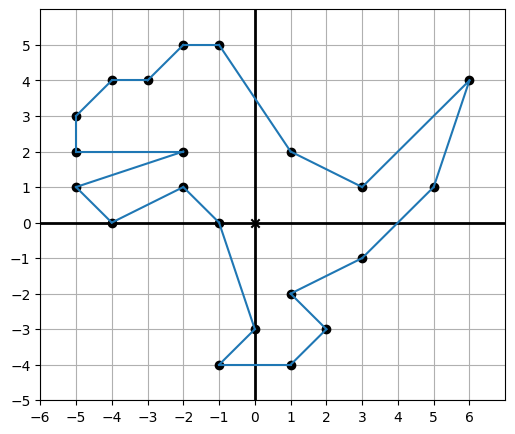

In [6]:
from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
(-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
(-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
Points(*dino_vectors),
Polygon(*dino_vectors)
)

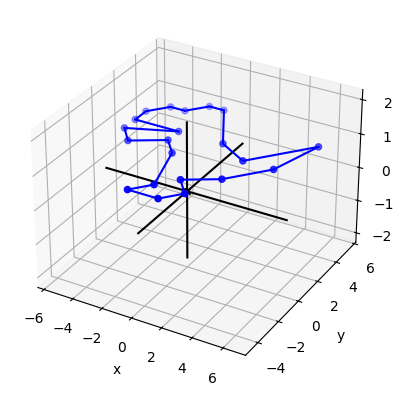

In [7]:
from draw3d import *
def polygon_segments_3d(points,color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count],color=color) for i in
            range(0,count)]

dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
Points3D(*dino_3d, color='blue'),
*polygon_segments_3d(dino_3d)
)

In [ ]:
magic_matrix = (
(1,0,3),
(0,1,1),
(0,0,1))

translated = [multiply_matrix_vector(magic_matrix, v) for v in
dino_3d]

In [22]:
projected_translated = [project_xy(i) for i in translated]

In [23]:
projected_translated

[(9, 5),
 (6, 2),
 (4, 3),
 (2, 6),
 (1, 6),
 (0, 5),
 (-1, 5),
 (-2, 4),
 (-2, 3),
 (1, 3),
 (-2, 2),
 (-1, 1),
 (1, 2),
 (2, 1),
 (3, -2),
 (2, -3),
 (4, -3),
 (5, -2),
 (4, -1),
 (6, 0),
 (8, 2)]

In [27]:
draw(
Points(*projected_translated),
Polygon(projected_translated)
)

TypeError: Unrecognized object: Polygon22((9, 5) ...)

In [28]:
print("dino_vectors type:", type(dino_vectors))
print("projected_translated type:", type(projected_translated))
print("dino_vectors[0] type:", type(dino_vectors[0]))
print("projected_translated[0] type:", type(projected_translated[0]))

dino_vectors type: <class 'list'>
projected_translated type: <class 'list'>
dino_vectors[0] type: <class 'tuple'>
projected_translated[0] type: <class 'tuple'>
